In [10]:
from os.path import abspath
from pypot.creatures import PoppyTorso

scene_path = abspath('./vrep-sensors/torso_sensors_scene.ttt')
config_path = abspath('./vrep-sensors/torso_vrep_sensors_config.json')
poppy = PoppyTorso(simulator='vrep', scene=scene_path, config=config_path)

In [11]:
# list of loaded sensors
[sensor.name for sensor in poppy.sensors]

[u'Vision_sensor', u'Proximity_sensor', u'floating_camera']

Populating the interactive namespace from numpy and matplotlib
FPS: 25
Resolution: 256x256


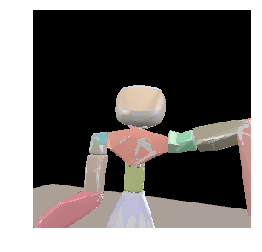

In [12]:
#using a floating vision sensor (floating_camera)
%pylab inline 
# Display the frame from floating_camera
axis('off')
imshow(poppy.floating_camera.frame[:,:,::-1])

print "FPS: " + str(poppy.floating_camera.fps)
res_x, res_y = poppy.floating_camera.resolution
print "Resolution: " + str(res_x) + "x" + str(res_y)

Populating the interactive namespace from numpy and matplotlib
FPS: 25
Resolution: 512x512


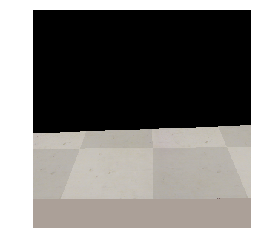

In [13]:
#using a vision sensor on Poppy's head(Vision_sensor)
%pylab inline 
# Display the frame from Vision_sensor
axis('off')
imshow(poppy.Vision_sensor.frame[:,:,::-1])

print "FPS: " + str(poppy.Vision_sensor.fps)
res_x, res_y = poppy.Vision_sensor.resolution
print "Resolution: " + str(res_x) + "x" + str(res_y)

In [14]:
# reading the proximity sensor
(is_object_in_range,
 detected_point,
 detected_object_handle,
 detected_surface_normal_vector) = poppy.Proximity_sensor.scan()

print "Something detected: {}".format(is_object_in_range)

Something detected: False


In [15]:
# move the arm to the detection range of the sensor
poppy.r_shoulder_y.goto_position(-50, 0.5, wait=False)
poppy.r_shoulder_x.goto_position(0, 0.5, wait=False)
poppy.r_arm_z.goto_position(20, 0.5, wait=False)
poppy.r_elbow_y.goto_position(0, 0.5, wait=True)

# reading the proximity sensor
(is_object_in_range,
 detected_point,
 detected_object_handle,
 detected_surface_normal_vector) = poppy.Proximity_sensor.scan()

print "Something detected: {}, at {}, handle {}, surface {}".format(is_object_in_range,
 detected_point,
 detected_object_handle,
 detected_surface_normal_vector)

Something detected: True, at [-0.02181938663125038, -0.05585628002882004, 0.18578603863716125], handle 69, surface [0.1801634132862091, 0.6581368446350098, -0.7310245633125305]


In [9]:
# stop the simulation and close vrep connection
poppy.stop_and_close_simulation()
